In [7]:
from keras import layers
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Model

In [6]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [9]:
from sklearn.model_selection import train_test_split

In [2]:
import keras

In [3]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [8]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)

# model.layers.pop()


# Freeze the layers 
for layer in model.layers[:10]:
    layer.trainable = False


# Add 'softmax' instead of earlier 'prediction' layer.
model.add(Dense(1, activation='sigmoid'))


# Check the summary, and yes new layer has been added. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [14]:
Dir = (r"C:\Users\Tauseef\Deep_Learning\3- CNN\Data")
cat = ['cats','dogs']

In [16]:
data = []
for categories in cat:
    folder = os.path.join(Dir, categories)
    label = cat.index(categories)
    for img in os.listdir(folder)[:1000]:
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (224, 224))
        data.append([img_arr, label])

In [17]:
len(data)

2000

In [18]:
random.shuffle(data)

In [19]:
X = []
Y = []
for features , labels in data:
    X.append(features)
    Y.append(labels)

In [20]:
X = np.array(X)
Y = np.array(Y)

In [21]:
X = X/255

In [22]:
X.shape

(2000, 224, 224, 3)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 224, 224, 3)
(600, 224, 224, 3)
(1400,)
(600,)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(90,90,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [25]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(lr=1e-4)

In [26]:
import keras
model.compile(optimizer=optimizer, loss=('binary_crossentropy'), metrics=['accuracy'])

In [ ]:
model.summary()

In [27]:
print(X_train.shape)
print(y_train.shape)

(1400, 224, 224, 3)
(1400,)


In [28]:
hist = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
44/44 [==============================] - 437s 10s/step - loss: 1.0495 - accuracy: 0.5507
Epoch 2/5
44/44 [==============================] - 407s 9s/step - loss: 0.5747 - accuracy: 0.7000
Epoch 3/5
44/44 [==============================] - 441s 10s/step - loss: 0.3867 - accuracy: 0.8250
Epoch 4/5
44/44 [==============================] - 448s 10s/step - loss: 0.2640 - accuracy: 0.8900
Epoch 5/5
44/44 [==============================] - 422s 10s/step - loss: 0.1548 - accuracy: 0.9421


In [29]:
model.save("VGG_MODEL.h5")

In [39]:
def get_indices(Y):
  y = []
  for i in Y:
    y.append(0 if i <.5 else 1) 
  
  return np.array(y)

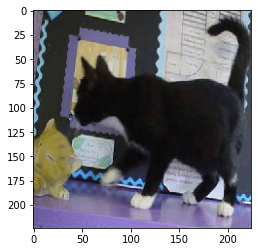

In [40]:
#test_img = cv2.imread(r"C:\Users\Tauseef\Desktop\NN NCBC NVT\dogscats\Data\dog.32.jpg")
batch_holder = np.zeros((20, 224, 224, 3))
img_dir = (r"C:\Users\Tauseef\Deep_Learning\3- CNN\Data\test1")

for i,img in enumerate(os.listdir(img_dir)):
    img = image.load_img(os.path.join(img_dir,img), target_size=(224,224))
    plt.imshow(img)
    batch_holder[i, :] = img

[0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1]


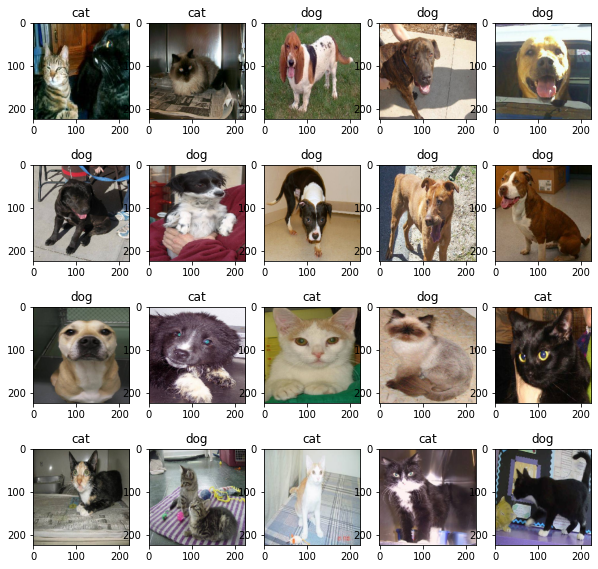

In [48]:
result = model.predict(batch_holder)
result = get_indices(result)
fig = plt.figure(figsize=(10, 10))

for i,img in enumerate(batch_holder):
    fig.add_subplot(4,5, i+1)
    plt.title(str('cat' if result[i] == 0 else 'dog'))
    plt.imshow(img/256.)
  
print(result)

In [38]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

5/5 [==============================] - 83s 17s/step - loss: 0.1774 - accuracy: 0.9400
test loss, test acc: [0.17736279964447021, 0.9399999976158142]
